In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
ess = pd.read_csv('/Users/salilketkar/thinkful/DS_Unit5/ESSdata_Thinkful.csv')
print(ess.shape)
ess.head()

(8594, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
pd.value_counts(ess['cntry'])

ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [4]:
ess.dropna(inplace=True)
print(ess.shape)
ess.head()

(8147, 13)


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

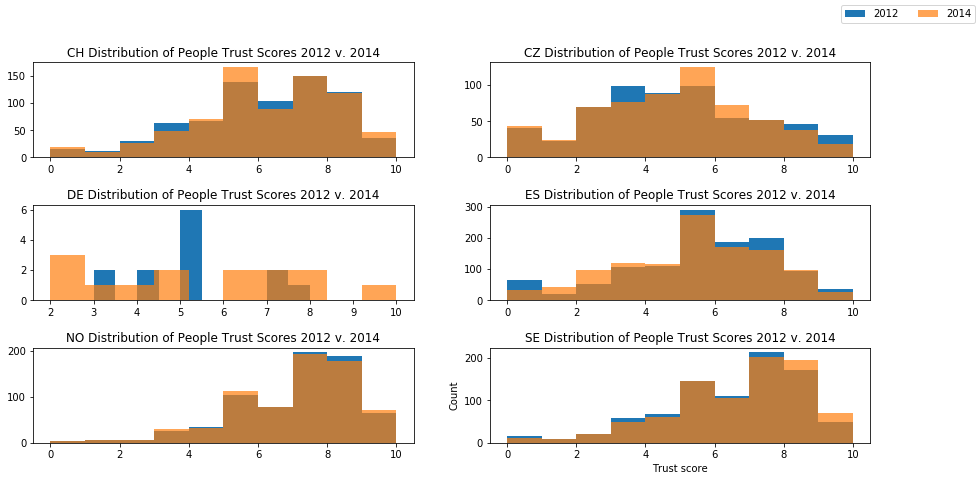

In [5]:
fig, axes = plt.subplots(3,2,figsize=(15,7))
for country, ax in zip(np.unique(ess['cntry']), axes.flat):
    ax.hist(ess[(ess['cntry'] == country) & (ess['year']==6)]['ppltrst'])
    ax.hist((ess[(ess['cntry'] == country) & (ess['year']==7)]['ppltrst']), alpha=0.7)
    ax.set_title('{} Distribution of People Trust Scores 2012 v. 2014'.format(country))
    plt.xlabel('Trust score')
    plt.ylabel('Count')
fig.legend(['2012','2014'], loc='upper right',ncol=2 )
fig.subplots_adjust(hspace=.5)
plt.show()

The six histograms above show the distribution of trust scores for each country in 2012 and 2014.  Visually one can see that the  distributions are not normal. For this reason, a t-test is not appropriate.

In [6]:
for country in np.unique(ess['cntry']):
    print(country)
    print(stats.mannwhitneyu(ess[(ess['cntry'] == country) & (ess['year']==6)]['ppltrst'],ess[(ess['cntry'] == country) & (ess['year']==7)]['ppltrst']))                                                                  
                                                                                             

CH
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)
CZ
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)
DE
MannwhitneyuResult(statistic=84.0, pvalue=0.3741417871944901)
ES
MannwhitneyuResult(statistic=617480.0, pvalue=0.006194821052719307)
NO
MannwhitneyuResult(statistic=248611.0, pvalue=0.3246607781543741)
SE
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


On average, people in Sweden and Spain became less trusting from 2012 to 2014.  There is no significant difference in the mean trust scores of the other countries. 

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

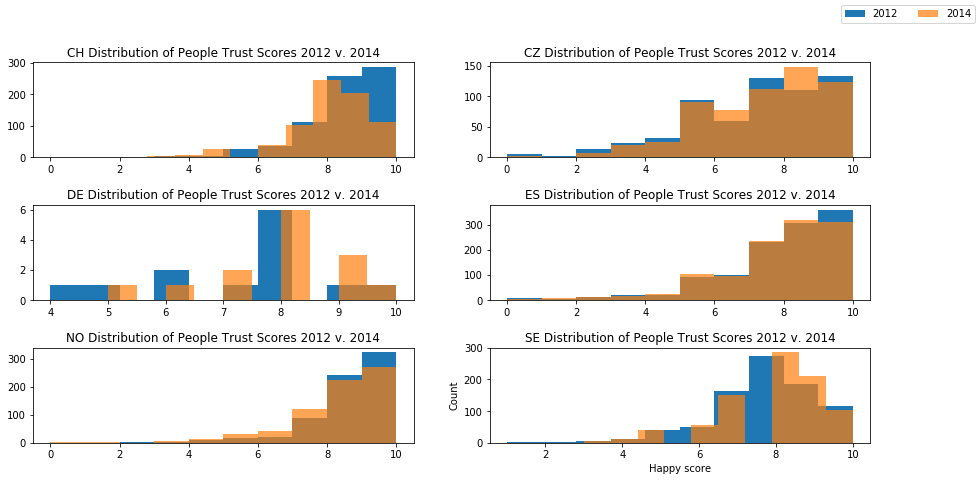

In [7]:
fig, axes = plt.subplots(3,2,figsize=(15,7))
for country, ax in zip(np.unique(ess['cntry']), axes.flat):
    ax.hist(ess[(ess['cntry'] == country) & (ess['year']==6)]['happy'])
    ax.hist((ess[(ess['cntry'] == country) & (ess['year']==7)]['happy']), alpha=0.7)
    ax.set_title('{} Distribution of People Trust Scores 2012 v. 2014'.format(country))
    plt.xlabel('Happy score')
    plt.ylabel('Count')
fig.legend(['2012','2014'], loc='upper right',ncol=2 )
fig.subplots_adjust(hspace=.5)
plt.show()

The six histograms above show the distribution of happiness scores for each country in 2012 and 2014.  Visually one can see that the  distributions are not normal. For to this reason, a t-test is not appropriate.

In [8]:
for country in np.unique(ess['cntry']):
    print(country)
    print(stats.mannwhitneyu(ess[(ess['cntry'] == country) & (ess['year']==6)]['happy'],ess[(ess['cntry'] == country) & (ess['year']==7)]['happy']))


CH
MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ
MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE
MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES
MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO
MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE
MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


On average, the people of Norway and Spain became happier from 2012 to 2014.  There was no significant difference in the mean happiness scores for the other countries. 

### Who reported watching more TV in 2012, men or women?

In [9]:
print(stats.shapiro(ess[ess['gndr']==1]['tvtot']))
print(stats.shapiro(ess[ess['gndr']==2]['tvtot']))

(0.9448409080505371, 1.1240212726905472e-36)
(0.942191481590271, 3.9355415802779e-37)


The Shapiro tests indicate both samples closely represent a Gaussian distribution

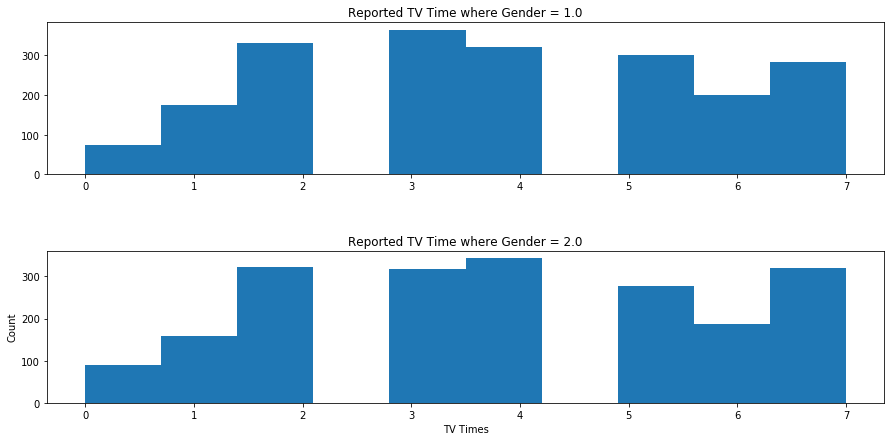

In [10]:
fig, axes = plt.subplots(2,1,figsize=(15,7))
for gender, ax in zip(np.unique(ess['gndr']), axes.flat):
    ax.hist(ess[(ess['gndr'] == gender) & (ess['year']==6)]['tvtot'])
    ax.set_title('Reported TV Time where Gender = {}'.format(gender))
    plt.xlabel('TV Times')
    plt.ylabel('Count')
fig.subplots_adjust(hspace=.5)
plt.show()

In [11]:
t, p = stats.ttest_ind(ess[(ess['year']==6) & (ess['gndr']==1)]['tvtot'], ess[(ess['year']==6) & (ess['gndr']==2)]['tvtot'])
print('One tailed p-value equals',(p/2), 'and the t-value equals', t)
print('Two tailed p-value equals', p)

One tailed p-value equals 0.2319969823055077 and the t-value equals -0.7323552192640558
Two tailed p-value equals 0.4639939646110154


A one sided p-value was calculated since the reported TV watching times can not be negative. 

### Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [12]:
pd.value_counts(ess['partner'])

1.0    5013
2.0    3134
Name: partner, dtype: int64

In [13]:
print(stats.shapiro(ess[ess['partner']==1]['pplfair']))
print(stats.shapiro(ess[ess['partner']==2]['pplfair']))

(0.9420869946479797, 1.6676572764236783e-40)
(0.9551196098327637, 4.9899520782236515e-30)


/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The Shapiro tests indicate both samples closely represent a Gaussian distribution

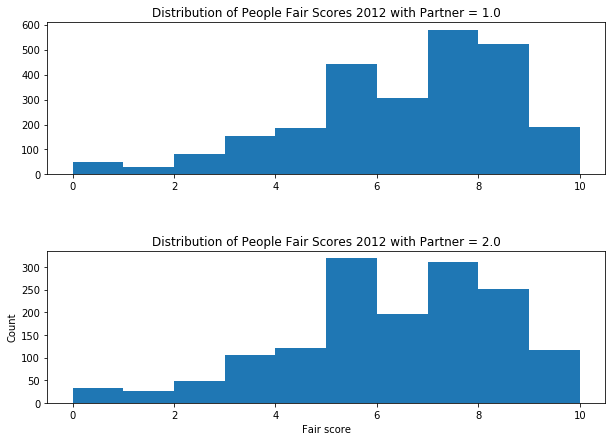

In [14]:
fig, axes = plt.subplots(2,1,figsize=(10,7))
for partners, ax in zip(np.unique(ess['partner']), axes.flat):
    ax.hist((ess[(ess['partner'] == partners) & (ess['year']==6)]['pplfair']))
    ax.set_title('Distribution of People Fair Scores 2012 with Partner = {}'.format(partners))
    plt.xlabel('Fair score')
    plt.ylabel('Count')
fig.subplots_adjust(hspace=.5)
plt.show()

In [15]:
print(stats.ttest_ind(ess[(ess['year']==6) & (ess['partner']==1)]['pplfair'], ess[(ess['year']==6) & (ess['partner']==2)]['pplfair']))


Ttest_indResult(statistic=3.0430439318464235, pvalue=0.002356936676939248)


A one sided p-value was calculated since the reported fairness scores can not be negative. 

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [16]:
print(stats.shapiro(ess[ess['cntry']=='CH']['sclmeet']))
print(stats.shapiro(ess[ess['cntry']=='NO']['sclmeet']))
print(stats.shapiro(ess[ess['cntry']=='CZ']['sclmeet']))

(0.8958631753921509, 1.760505163463813e-30)
(0.8763887882232666, 3.892804120255138e-32)
(0.9381007552146912, 5.25528482280574e-22)


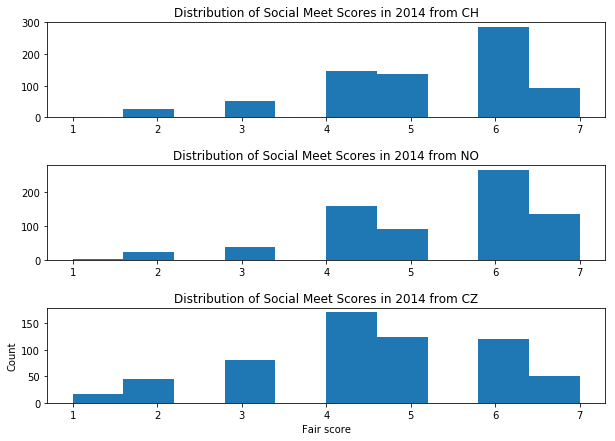

In [17]:
countries = ['CH','NO','CZ']

fig, axes = plt.subplots(3,1,figsize=(10,7))
for country, ax in zip(countries, axes.flat):
    ax.hist((ess[(ess['cntry'] == country) & (ess['year']==7)]['sclmeet']))
    ax.set_title('Distribution of Social Meet Scores in 2014 from {}'.format(country))
    plt.xlabel('Fair score')
    plt.ylabel('Count')
fig.subplots_adjust(hspace=.5)
plt.show()

In [18]:
print(stats.median_test(
    (ess[(ess['cntry'] == 'CH') & (ess['year']==7)]['sclmeet']),
    (ess[(ess['cntry'] == 'NO') & (ess['year']==7)]['sclmeet'])))
      
print(stats.median_test((ess[(ess['cntry'] == 'NO') & (ess['year']==7)]['sclmeet']),
    (ess[(ess['cntry'] == 'CZ') & (ess['year']==7)]['sclmeet'])))

print(stats.median_test(
    (ess[(ess['cntry'] == 'CH') & (ess['year']==7)]['sclmeet']),
    (ess[(ess['cntry'] == 'CZ') & (ess['year']==7)]['sclmeet'])))

(11.00062907738536, 0.0009108096884363367, 6.0, array([[ 92, 134],
       [651, 578]]))
(102.11071453758723, 5.2503798209606056e-24, 5.0, array([[399, 171],
       [313, 435]]))
(70.05744035430031, 5.760245257133138e-17, 5.0, array([[378, 171],
       [365, 435]]))


### Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

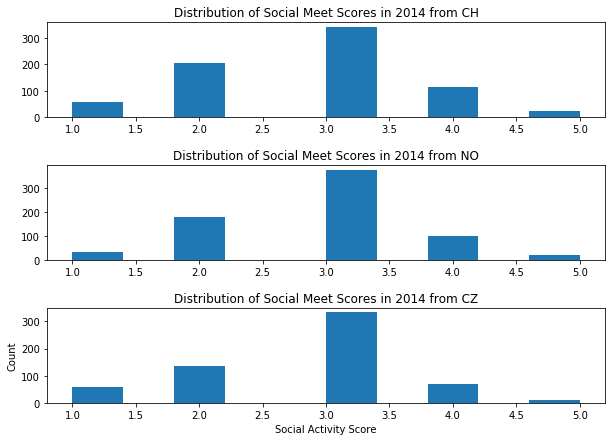

In [19]:
countries = ['CH','NO','CZ']

fig, axes = plt.subplots(3,1,figsize=(10,7))
for country, ax in zip(countries, axes.flat):
    ax.hist((ess[(ess['cntry'] == country) & (ess['year']==7)]['sclact']))
    ax.set_title('Distribution of Social Meet Scores in 2014 from {}'.format(country))
    plt.xlabel('Social Activity Score')
    plt.ylabel('Count')
fig.subplots_adjust(hspace=.5)
plt.show()

In [20]:
print(stats.ttest_ind((ess[(ess['cntry'] == 'CH') & (ess['year']==7)]['sclact']), (ess[(ess['cntry'] == 'NO') & (ess['year']==7)]['sclact'])))
      
print(stats.ttest_ind((ess[(ess['cntry'] == 'NO') & (ess['year']==7)]['sclact']), (ess[(ess['cntry'] == 'CZ') & (ess['year']==7)]['sclact'])))

print(stats.ttest_ind((ess[(ess['cntry'] == 'CH') & (ess['year']==7)]['sclact']), (ess[(ess['cntry'] == 'CZ') & (ess['year']==7)]['sclact'])))


Ttest_indResult(statistic=-1.680661879471351, pvalue=0.09304354378556014)
Ttest_indResult(statistic=2.861670223005847, pvalue=0.004280825791403077)
Ttest_indResult(statistic=1.148808631379681, pvalue=0.25083885461561173)


Switzerland and Norway stand out for their social activity scores. 